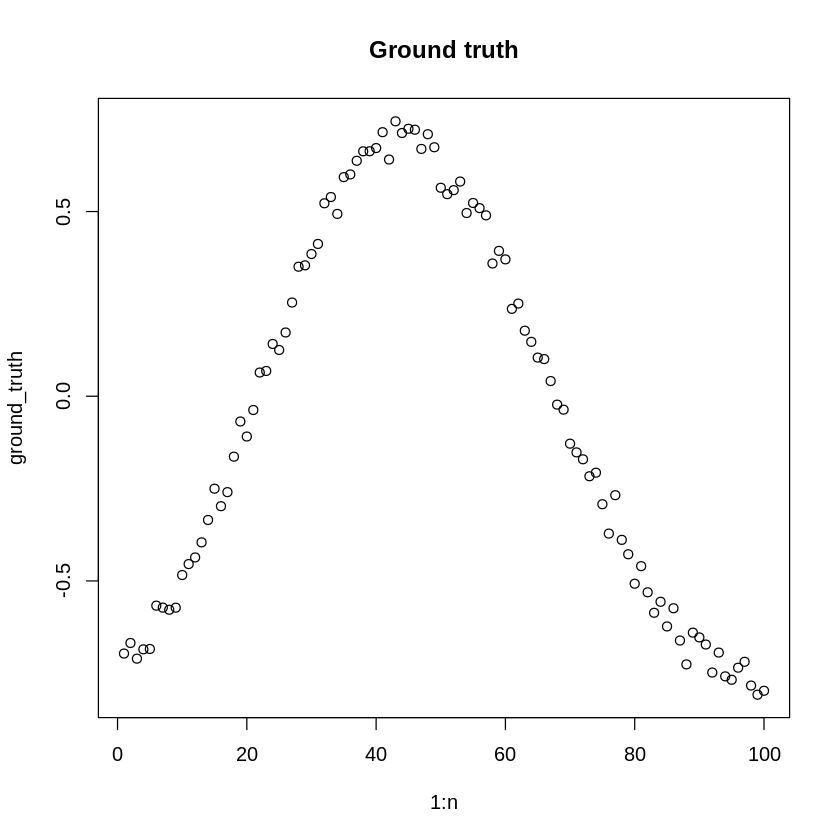


Call:
   c("inla.core(formula = formula, family = family, contrasts = contrasts, 
   ", " data = data, quantiles = quantiles, E = E, offset = offset, ", " 
   scale = scale, weights = weights, Ntrials = Ntrials, strata = strata, 
   ", " lp.scale = lp.scale, link.covariates = link.covariates, verbose = 
   verbose, ", " lincomb = lincomb, selection = selection, control.compute 
   = control.compute, ", " control.predictor = control.predictor, 
   control.family = control.family, ", " control.inla = control.inla, 
   control.fixed = control.fixed, ", " control.mode = control.mode, 
   control.expert = control.expert, ", " control.hazard = control.hazard, 
   control.lincomb = control.lincomb, ", " control.update = 
   control.update, control.lp.scale = control.lp.scale, ", " 
   control.pardiso = control.pardiso, only.hyperparam = only.hyperparam, 
   ", " inla.call = inla.call, inla.arg = inla.arg, num.threads = 
   num.threads, ", " blas.num.threads = blas.num.threads, keep = keep, 


[1] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824
 [8] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824
[15] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824
[22] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824
[29] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824
[36] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824
[43] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824
[50] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824
[57] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824
[64] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824
[71] -1.623824 -1.623824 -1.623824 -1.623824 -1.623824 -1.623824

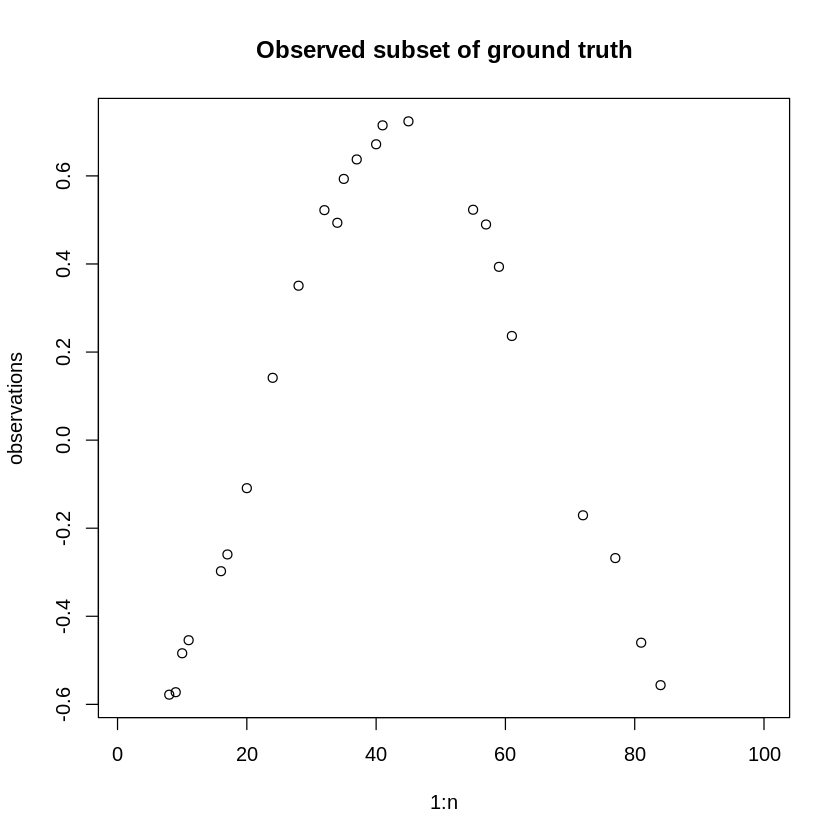

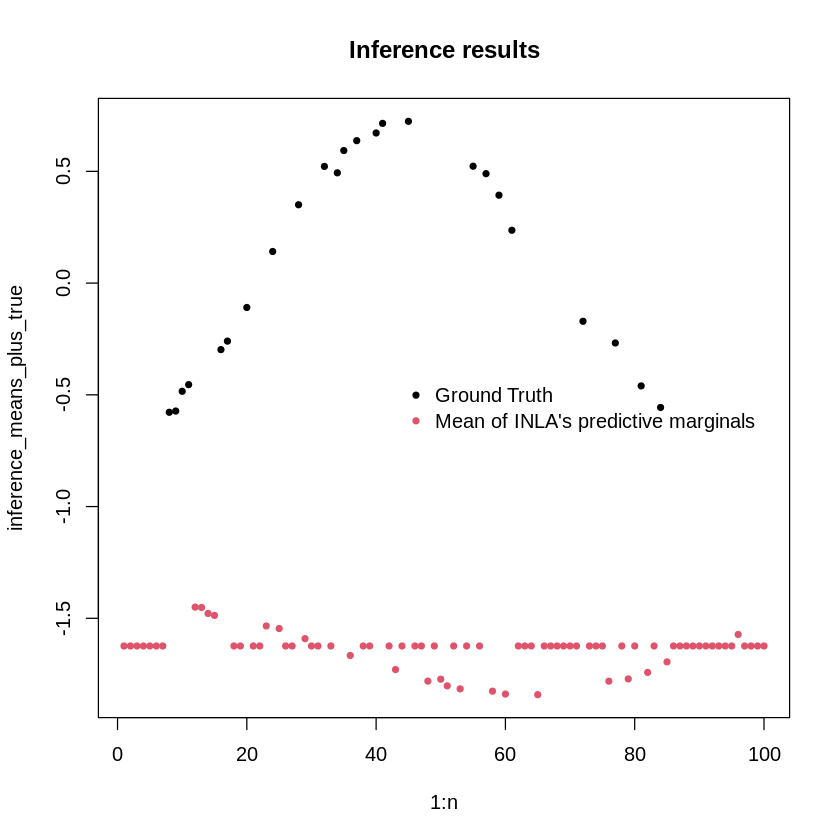

In [3]:
library(INLA)
library(invgamma)
library("MASS")
library("fdrtool")

n = 100

x= (1:n) / n

# =================================================
# gp definition

# kernel priors
length = rinvgamma(1, 4.0, 1.0)
var = rlnorm(1, 0., 0.1)

# distance matrix
XtX <- tcrossprod(x)
XX <- matrix(1, n) %*% diag(XtX)
D <- XX - 2*XtX + t(XX) # distance matrix

# complete kernel
k = var * exp(-0.5 * (D/length ^ 2 ))
k = k + diag(2e-5, n, n)

f = mvrnorm(1, rep(0, n), k)

sigma = rhalfnorm(1, 100)
sigma_mat = diag(sigma, n, n) 
y = mvrnorm(1, f, sigma_mat)


# ============================================
# INLA/inference 
ground_truth = c(-0.6965187788009644, -0.6679209470748901, -0.7103891372680664, -0.6851717829704285, -0.6841915249824524, -0.5668666362762451, -0.5722213387489319, -0.5780259966850281, -0.5724526047706604, -0.48403918743133545, -0.4543328881263733, -0.436381459236145, -0.3955748379230499, -0.3349480628967285, -0.2502446174621582, -0.29764896631240845, -0.2595856785774231, -0.16356737911701202, -0.06836479902267456, -0.10906502604484558, -0.03724215179681778, 0.06418919563293457, 0.06843328475952148, 0.14150741696357727, 0.12523609399795532, 0.17257541418075562, 0.2536618709564209, 0.3506408929824829, 0.3543667197227478, 0.3849707543849945, 0.4122837483882904, 0.5222899913787842, 0.5392687320709229, 0.4935515820980072, 0.5931767821311951, 0.6004530191421509, 0.6374411582946777, 0.6630330085754395, 0.6631835103034973, 0.6718357801437378, 0.71482914686203, 0.6407859921455383, 0.7441797852516174, 0.7126187682151794, 0.7239460349082947, 0.7214811444282532, 0.6694684028625488, 0.7093082070350647, 0.6740366816520691, 0.5644036531448364, 0.547078549861908, 0.5578815340995789, 0.5812382698059082, 0.4959672689437866, 0.5231911540031433, 0.5092390775680542, 0.4897089898586273, 0.35933029651641846, 0.3935067057609558, 0.3704443573951721, 0.23652081191539764, 0.2508527636528015, 0.1774042695760727, 0.14722715318202972, 0.10458831489086151, 0.10060330480337143, 0.04113604873418808, -0.022685861214995384, -0.036370061337947845, -0.12842771410942078, -0.15198564529418945, -0.17068874835968018, -0.21663402020931244, -0.2069537341594696, -0.2923087179660797, -0.37178802490234375, -0.2678752839565277, -0.38881829380989075, -0.4278460741043091, -0.5075673460960388, -0.45998191833496094, -0.5307313799858093, -0.5861528515815735, -0.5564097166061401, -0.6231715679168701, -0.5739148855209351, -0.6613097786903381, -0.7259194254875183, -0.6399742364883423, -0.6528728604316711, -0.6721140146255493, -0.7479739785194397, -0.6939185857772827, -0.7583205103874207, -0.767551839351654, -0.7348857522010803, -0.7188783884048462, -0.7831867933273315, -0.8078792691230774, -0.7973722815513611)

obs_idx = c(8, 9, 10, 11, 16, 17, 20, 24, 28, 32, 34, 35,37,40, 41, 45,55, 57,59, 61, 72, 77, 81, 84)



observations = rep(NA, n)
for (i in 1:length(obs_idx)){
  observations[obs_idx[i]] = ground_truth[obs_idx[i]] 
}

plot(1:n, ground_truth, main="Ground truth")
plot(1:n, observations, main="Observed subset of ground truth")

na_points = which(is.na(observations))


data = list(y=y, tmean=observations)
formula = y ~ tmean
result = inla(formula, family = "gaussian", data = data, control.predictor = list(compute = TRUE), control.compute = list(config = TRUE, return.marginals.predictor=TRUE))

summary(result)


result$summary.fitted.values[na_points, c("mean")]


inference_means_plus_true = rep(NA, n)
colours = rep(NA, n)
for (i in 1:length(obs_idx)){
  inference_means_plus_true[obs_idx[i]] = ground_truth[obs_idx[i]] 
  colours[obs_idx[i]] = 1
}
for (i in 1:length(na_points)){
  inference_means_plus_true[na_points[i]] = result$summary.fitted.values[i, c("mean")]
  colours[na_points[i]] = 2
}

plot(1:n, inference_means_plus_true, col=colours, pch=20, main="Inference results")
legend("right", legend = c("Ground Truth", "Mean of INLA's predictive marginals"), col = 1:2, pch = 20, bty = "n")

